In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#%matplotlib inline
sns.set_theme()
pd.options.display.float_format = '{:.2f}'.format


df = pd.read_csv('deptosDataset.csv')
df.head(10)

,titulo,precio,ubicacion,dorm,ban,sup
0,b'VENDO DEPARTAME',U$S 40.000,San Vicente,1,1,45
1,b'GRAL PAZ-2 BALC',U$S 55.000,General Paz,1,1,sin datos
2,b'GENERAL PAZ-CAT',U$S 60.000,General Paz,1,1,sin datos
3,b'Tr\xc3\xa1nsito C\xc3\xa1ce',U$S 67.000,Nueva Córdoba,1,1,45
4,b'B\xc2\xba LOMAS DE MA',U$S 130.000,sin ubicacion,3,3,130
5,b'\xe2\x80\xa2Gral PAZ\xe2\x80\xa2 ',U$S 63.000,General Paz,1,sin datos,47
6,b'CASA MIRADORES ',U$S 211.000,Manantiales,3,3,sin datos
7,b'VENDO DUPLEX EN',U$S 114.000,sin ubicacion,3,3,sin datos
8,b'VENTA- DUPLEX E',U$S 86.000,Docta Urbanización Inteligente,2,2,sin datos
9,b'Condominio Prem',U$S 78.800,Chateau Carreras,1,1,47


In [2]:
df.drop(df[df['precio']=='consultar'].index, inplace=True)

In [3]:
def convertirPrecio(value):
    newValue = value.replace('.','').replace('U$S ','')
    
    return int(newValue)

In [4]:
df['precio'] = df['precio'].apply(convertirPrecio)

In [5]:
dfBarrios = df.groupby('ubicacion')['ubicacion'].agg('count')
dfBarrios.head

<bound method NDFrame.head of ubicacion
 10 de Agosto            4
 A.T.E.                  2
 Alberdi               218
 Alejandro Centeno       2
 Alta Córdoba          111
                      ... 
 Villa Urquiza           1
 Villa Warcalde          4
 Yofre Sud               1
 Zumaran                 1
sin ubicacion          102
Name: ubicacion, Length: 169, dtype: int64>

In [6]:
df.ubicacion = df.ubicacion.apply(lambda x: x.strip())
estadisticasUbicacion = df.groupby('ubicacion')['ubicacion'].agg('count').sort_values(ascending=False)
estadisticasUbicacion

ubicacion
Nueva Córdoba          903
Centro                 426
General Paz            395
Alberdi                218
Alto Alberdi           119
                      ... 
Cañitas                  1
San Ignacio Village      1
Bella Vista Oeste        1
San José                 1
Los Platanos             1
Name: ubicacion, Length: 169, dtype: int64

In [7]:
otras_ubicaciones = estadisticasUbicacion[estadisticasUbicacion<10]
otras_ubicaciones

ubicacion
San Ignacio            9
Jardín Hipodromo       9
Paso de los Andes      9
Villa Revol            9
Alto Verde             8
                      ..
Cañitas                1
San Ignacio Village    1
Bella Vista Oeste      1
San José               1
Los Platanos           1
Name: ubicacion, Length: 133, dtype: int64

In [8]:
df.ubicacion = df.ubicacion.apply(lambda x: 'other' if x in otras_ubicaciones else x)

In [9]:
estadisticasUbicacionFinal = df.groupby('ubicacion')['ubicacion'].agg('count').sort_values(ascending=False)
estadisticasUbicacionFinal

ubicacion
Nueva Córdoba                     903
Centro                            426
General Paz                       395
other                             351
Alberdi                           218
Alto Alberdi                      119
Cofico                            118
Alta Córdoba                      111
sin ubicacion                     102
Manantiales                        95
Guemes                             55
Villa Belgrano                     52
Chateau Carreras                   44
Otro                               41
Pueyrredon                         39
San Martin                         37
Greenville 2                       37
Valle Escondido                    33
Providencia                        33
Quebrada de las Rosas              31
Observatorio                       30
Docta Urbanización Inteligente     28
San Vicente                        27
Jardín                             22
Jardín Claret                      20
Urca                               19
La

In [10]:
dorm_sindatos_indexes = df[df['dorm'] == 'sin datos'].index
df.drop(dorm_sindatos_indexes, inplace= True)

In [11]:
conteo_dormitorios = df.groupby('dorm')['dorm'].agg('count')
conteo_dormitorios

dorm
1               1726
2               1017
3                668
4                 46
Monoambiente      42
Name: dorm, dtype: int64

In [12]:
df.dorm = df.dorm.apply(lambda x: '0' if x =='Monoambiente' else x)

In [13]:
conteo_dormitorios = df.groupby('dorm')['dorm'].agg('count')
conteo_dormitorios

dorm
0      42
1    1726
2    1017
3     668
4      46
Name: dorm, dtype: int64

In [14]:
df["dorm"] = df["dorm"].astype("int64")

In [15]:
df.drop(df[df['ban']=='+'].index, inplace = True)

In [16]:
df.drop(df[df['ban']=='sin datos'].index, inplace = True)

In [17]:
df["ban"] = df["ban"].astype("int64")

In [18]:
df.drop(df[df['ubicacion'] == 'sin ubicacion'].index, inplace = True)
df.shape

(3257, 6)

In [19]:
df.drop(['titulo'], axis=1, inplace=True)
df.head()

,precio,ubicacion,dorm,ban,sup
0,40000,San Vicente,1,1,45
1,55000,General Paz,1,1,sin datos
2,60000,General Paz,1,1,sin datos
3,67000,Nueva Córdoba,1,1,45
6,211000,Manantiales,3,3,sin datos


In [20]:
df = df.drop(df[df['sup']=='sin datos'].index)

In [21]:
df['sup'] = df['sup'].astype('int64')

In [22]:
df['precio/m2'] = df['precio']/df['sup']

In [23]:
df['sup/ban'] = df['sup']/df['ban']

In [24]:
df.describe()

,precio,dorm,ban,sup,precio/m2,sup/ban
count,988.00,988.00,988.00,988.00,988.00,988.00
mean,84944.50,1.55,1.38,76.88,2691.96,57.45
std,66712.79,0.77,0.63,192.89,21022.88,188.20
min,10000.00,0.00,1.00,1.00,3.37,0.25
25%,47000.00,1.00,1.00,45.00,888.89,41.50
50%,65000.00,1.00,1.00,54.00,1154.93,45.00
75%,95000.00,2.00,2.00,80.00,1445.63,60.00
max,598000.00,4.00,4.00,5926.00,598000.00,5926.00


BANOS:la cantidad de banos no puede ser mayor a la cantidad de dormitorios+1 (ejemplo: un monoambiente tiene 0 dormitorios, y solo puede tener hasta 1 bano)

In [25]:
df[df['ban']>df['dorm']+1]

,precio,ubicacion,dorm,ban,sup,precio/m2,sup/ban
877,50000,Centro,0,2,105,476.19,52.50
1441,424985,Cerro de las Rosas,2,4,200,2124.93,50.00
1826,195000,Urca,2,4,300,650.00,75.00
2011,35000,San Vicente,1,3,60,583.33,20.00
2240,18000,General Paz,0,3,24,750.00,8.00


In [26]:
df.drop(df[df['ban']>df['dorm']+1].index, inplace = True)

debido a que se encuentran valores máximos muy atípicos (superficie de 5926 m2, se procede a eliminar dichos registros)

In [27]:
df.drop(df[df['sup'] == 5926].index, inplace = True)

In [28]:
df.describe()

,precio,dorm,ban,sup,precio/m2,sup/ban
count,982.00,982.00,982.00,982.00,982.00,982.00
mean,84706.91,1.55,1.37,70.61,2703.73,51.56
std,65839.89,0.77,0.62,49.48,21086.47,22.17
min,10000.00,0.00,1.00,1.00,112.00,0.25
25%,47000.00,1.00,1.00,45.00,890.23,41.50
50%,65000.00,1.00,1.00,54.00,1155.90,45.00
75%,95000.00,2.00,2.00,80.00,1445.98,60.00
max,598000.00,4.00,4.00,518.00,598000.00,259.00


SUPERFICIE MIN:
se toma como referencia departamentos desde 25 m2.
SUPERFICIE MAX:
se toman como referencia departamentos de hasta 100 m2.

In [29]:
df.drop(df[df['sup']>100].index, inplace = True)

In [30]:
df.drop(df[df['sup']<25].index, inplace = True)

In [31]:
df.describe()

,precio,dorm,ban,sup,precio/m2,sup/ban
count,830.00,830.00,830.00,830.00,830.00,830.00
mean,68281.42,1.36,1.20,56.27,1205.42,48.77
std,36272.81,0.61,0.41,17.12,428.46,13.28
min,10000.00,0.00,1.00,25.00,128.21,20.00
25%,45000.00,1.00,1.00,44.00,900.00,41.00
50%,59700.00,1.00,1.00,50.00,1157.89,45.00
75%,80000.00,2.00,1.00,65.00,1435.27,53.75
max,320000.00,4.00,3.00,100.00,4000.00,100.00


Eliminación de outliers en 'precio/m2'.
Debido a que se siguien encontrando valores atípicos en la variable precio/m2 (ej:habiendo un valor max de 4000 precio/m2 muy alejado del resto de los datos, y valores minimos cercanos a 100 usd/m2) se procede a eliminarlo.

<AxesSubplot:xlabel='precio/m2'>

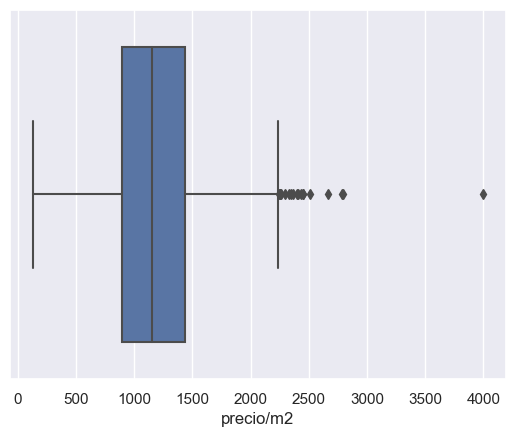

In [32]:
sns.boxplot(x='precio/m2', data=df)

In [33]:
media = df['precio/m2'].mean()
desvEstandar = df['precio/m2'].std()

df.drop(df[df['precio/m2'] < media - 1.8*desvEstandar].index, inplace = True)

In [34]:
media2 = df['precio/m2'].mean()
desvEstandar2 = df['precio/m2'].std()

df.drop(df[df['precio/m2'] > media2 + 3*desvEstandar2].index, inplace = True)

se puede observar que con la muestra actual, la distribución de la variable precio/m2 sigue una distribución que no llega a ser del todo normal, ya que se encuentra sesgada hacia la derecha. Esto no ocurre porque haya datos incorrectos, sino, porque con mucha menos frecuencia existen unidades de precios mas altos, pudiédose tratar de otro segmento. Además, un departamento parte de un precio/m2 siempre mayor a 0 (en este caso entre los 400 y 500 precio/m2), esto hace que, desde la izquierda, la curva comience en un nivel mas alto que su cola (se concentran con mayor frecuencia que las unidades en su cola)

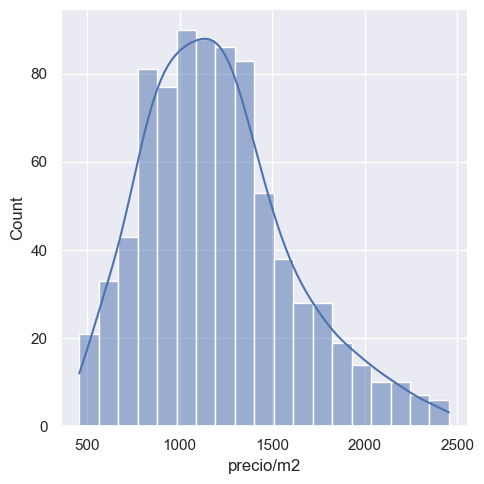

In [35]:
sns.displot(x='precio/m2', data=df, kde=True)

In [36]:
#agregar aca QQPLOT

Debido a que la variable a predecir se trata de una variable continua, se elegirán modelos de regresión.

Ya que los modelos de machine learning no pueden interpretar dato de texto, se procederá a transformar la variable 'ubicación' de texto a número.

In [37]:
dummies = pd.get_dummies(df.ubicacion)
dummies.head(3)

,Alberdi,Alta Córdoba,Alto Alberdi,Altos de Villa Sol,Centro,Cerro de las Rosas,Chateau Carreras,Cofico,Docta Urbanización Inteligente,General Paz,...,Providencia,Pueyrredon,Quebrada de las Rosas,San Martin,San Vicente,Tejas 1,Urca,Valle Escondido,Villa Belgrano,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
dfML = pd.concat([df,dummies.drop('other',axis='columns')], axis = 'columns')
dfML.head()

,precio,ubicacion,dorm,ban,sup,precio/m2,sup/ban,Alberdi,Alta Córdoba,Alto Alberdi,...,Otro,Providencia,Pueyrredon,Quebrada de las Rosas,San Martin,San Vicente,Tejas 1,Urca,Valle Escondido,Villa Belgrano
0,40000,San Vicente,1,1,45,888.89,45.00,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,67000,Nueva Córdoba,1,1,45,1488.89,45.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,78800,Chateau Carreras,1,1,47,1676.60,47.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,105000,General Paz,2,2,75,1400.00,37.50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,75000,General Paz,2,2,65,1153.85,32.50,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
dfML2 = dfML.drop('ubicacion', axis = 'columns')
dfML2.head(2)

,precio,dorm,ban,sup,precio/m2,sup/ban,Alberdi,Alta Córdoba,Alto Alberdi,Altos de Villa Sol,...,Otro,Providencia,Pueyrredon,Quebrada de las Rosas,San Martin,San Vicente,Tejas 1,Urca,Valle Escondido,Villa Belgrano
0,40000,1,1,45,888.89,45.00,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,67000,1,1,45,1488.89,45.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
x = dfML2.drop('precio', axis='columns')
x.head()

,dorm,ban,sup,precio/m2,sup/ban,Alberdi,Alta Córdoba,Alto Alberdi,Altos de Villa Sol,Centro,...,Otro,Providencia,Pueyrredon,Quebrada de las Rosas,San Martin,San Vicente,Tejas 1,Urca,Valle Escondido,Villa Belgrano
0,1,1,45,888.89,45.00,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,1,45,1488.89,45.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,1,47,1676.60,47.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,2,2,75,1400.00,37.50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,2,2,65,1153.85,32.50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
y = dfML2.precio
y.head()

0      40000
3      67000
9      78800
10    105000
11     75000
Name: precio, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 10)

In [44]:
from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()
modelLR.fit(x_train, y_train)
modelLR.score(x_test, y_test)

0.9602090620247298

In [45]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.95760766, 0.96738663, 0.96726626, 0.95735856, 0.95281635])

In [46]:
from sklearn.tree import DecisionTreeRegressor
cross_val_score(DecisionTreeRegressor(), x, y, cv=cv)

array([0.98032312, 0.98328235, 0.98012733, 0.96212909, 0.98570424])

In [47]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

C:\Users\esteb\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\esteb\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pi

,model,best_score,best_params
0,linear_regression,0.96,{'normalize': False}
1,lasso,0.96,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.98,"{'criterion': 'squared_error', 'splitter': 'be..."


In [48]:
df.head()

,precio,ubicacion,dorm,ban,sup,precio/m2,sup/ban
0,40000,San Vicente,1,1,45,888.89,45.00
3,67000,Nueva Córdoba,1,1,45,1488.89,45.00
9,78800,Chateau Carreras,1,1,47,1676.60,47.00
10,105000,General Paz,2,2,75,1400.00,37.50
11,75000,General Paz,2,2,65,1153.85,32.50


Graficando una matriz de correlación, se concluye que la superficie es la variable que más correlación tiene con el precio. Luego le siguen la cantidad de banos y la cantidad de dormitorios, levemente en menor medida.

C:\Users\esteb\AppData\Local\Temp\ipykernel_14224\3160324439.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


<AxesSubplot:>

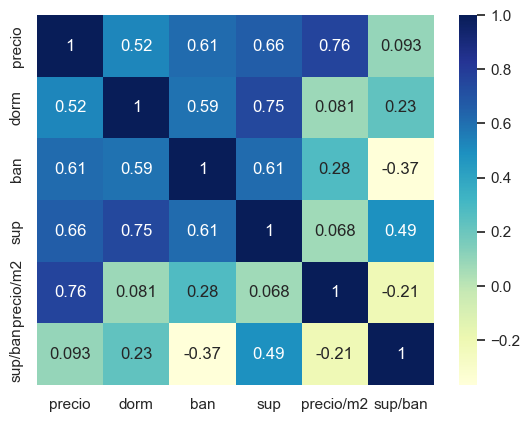

In [81]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)